# Estudios de Casos de Modelos Analíticos I

<br>**Contenido:**<br>
**1-** Presentación de la librería yfinance<br>
**2-** Presentación de la librería pandas-datareader<br>
**3-** Predicciones utilizando Scikit-Learn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import pandas_datareader.data as web
import datetime

# 1- Yfinance
**Instalación para Jupyter:**
    pip install yfinance<br>
**Instalación para Colab:** !pip install yfinance<br>
**Documentación:**
    https://pypi.org/project/yfinance/

In [2]:
BMA_yf = yf.Ticker("BMA.BA")
GGAL_yf = yf.Ticker("GGAL.BA")
BPAT_yf = yf.Ticker("BPAT.BA")
BBAR_yf = yf.Ticker("BBAR.BA")
BRIO_yf = yf.Ticker("BRIO.BA")
empresas = [BMA_yf, GGAL_yf, BPAT_yf, BBAR_yf, BRIO_yf]

In [3]:
BMA_yf.info

{'address1': 'Avenida Eduardo Madero 1182',
 'city': 'Buenos Aires',
 'country': 'Argentina',
 'phone': '54 11 5222 6500',
 'fax': '54 11 5222 8969',
 'website': 'https://www.macro.com.ar',
 'industry': 'Banks—Regional',
 'industryDisp': 'Banks—Regional',
 'sector': 'Financial Services',
 'longBusinessSummary': 'Banco Macro S.A. provides various banking products and services to retail and corporate customers in Argentina. It offers various retail banking products and services, such as savings and checking accounts, time deposits, credit and debit cards, consumer finance loans, mortgage loans, automobile loans, overdrafts, credit-related services, home and car insurance coverage, tax collection, utility payments, automated teller machines (ATMs), and money transfers. The company also provides personal loans, document discounts, residential mortgages, overdrafts, pledged loans, and credit card loans to retail customers. In addition, it offers corporate banking products and services, incl

In [4]:
def convertir_DataFrame(empresas):
    marketCap_values = []
    empleados_values = []
    cierre_values = []
    EPS_values = []
    index_df = []
    for item in empresas:
        marketCap_values.append(item.info["marketCap"] / 1000000000)
        empleados_values.append(item.info.get("fullTimeEmployees", None))
        cierre_values.append(item.info["previousClose"])
        EPS_values.append(item.info["trailingEps"])
        symbol = item.info["symbol"]
        index_df.append(symbol)
        data_df = {
            "Capitalización de Mercado": marketCap_values,
            "Cantidad de Empleados": empleados_values,
            "Último Cierre": cierre_values,
            "Ganancias por acción": EPS_values,
        }
    full_df = pd.DataFrame(data=data_df, index=index_df)
    return full_df

In [5]:
empresas_df = convertir_DataFrame(empresas)
empresas_df.head()

,Capitalización de Mercado,Cantidad de Empleados,Último Cierre,Ganancias por acción
BMA.BA,997.178933,7756.0,1349.40,-806.08
GGAL.BA,1196.540428,8742.0,854.95,32.97
BPAT.BA,193.592525,2944.0,274.50,27.72
BBAR.BA,612.526195,5957.0,1026.95,4.74
BRIO.BA,121.608815,NaN,33.50,2.64


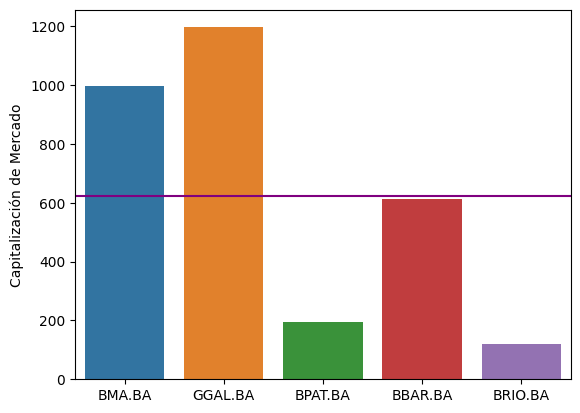

In [6]:
barras = sns.barplot(
    data=empresas_df, x=empresas_df.index, y=empresas_df["Capitalización de Mercado"]
)
barras.axhline(empresas_df["Capitalización de Mercado"].mean(), color="purple")
plt.show()

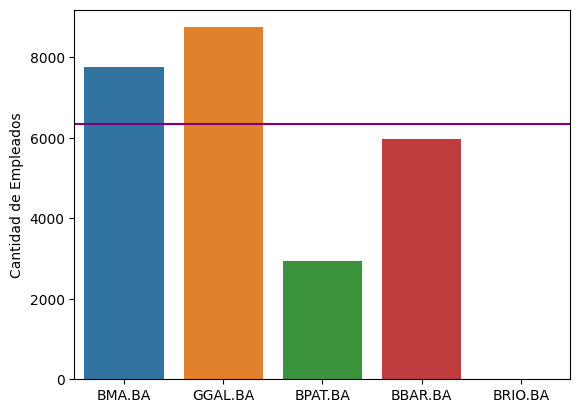

In [7]:
barras = sns.barplot(
    data=empresas_df, x=empresas_df.index, y=empresas_df["Cantidad de Empleados"]
)
barras.axhline(empresas_df["Cantidad de Empleados"].mean(), color="purple")
plt.show()

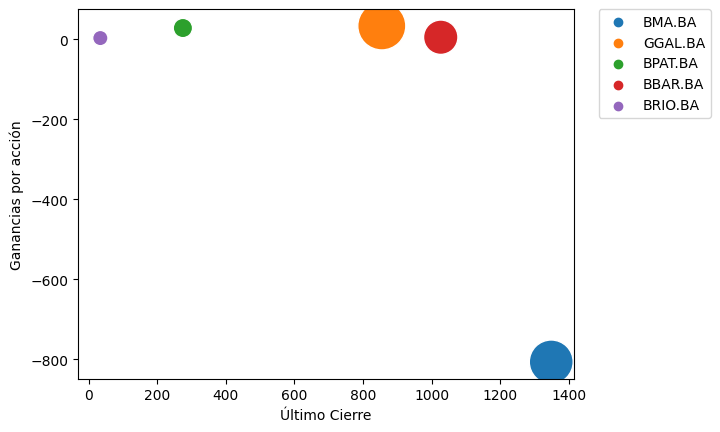

In [8]:
scatter = sns.scatterplot(
    data=empresas_df,
    x=empresas_df["Último Cierre"],
    y=empresas_df["Ganancias por acción"],
    s=empresas_df["Capitalización de Mercado"],
    hue=empresas_df.index,
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.show()

# 2- Pandas-datareader
**Instalación para Jupyter:**
    pip install pandas-datareader<br>
**Instalación para Colab:** !pip install --upgrade pandas_datareader<br>
En caso de no funcionar, volver a ejecutar tras haber reiniciado el entorno de ejecución.
**Documentación:**
    https://pandas-datareader.readthedocs.io/en/latest/

In [12]:
import datetime
from yahooquery import Ticker

comienzo = datetime.datetime(2020, 1, 1)
final = datetime.datetime(2021, 12, 7)

ticker = Ticker("NFLX")
df = ticker.history(start=comienzo, end=final)
df.tail()

open        high         low       close   volume  \
symbol date                                                                  
NFLX   2021-11-30  668.200012  675.380005  640.010010  641.900024  5608900   
       2021-12-01  649.479980  654.520020  617.070007  617.770020  3882800   
       2021-12-02  617.099976  625.359985  612.880005  616.469971  3331100   
       2021-12-03  622.750000  625.500000  594.000000  602.130005  4829300   
       2021-12-06  606.010010  617.289978  601.000000  612.690002  3075700   

                     adjclose  
symbol date                    
NFLX   2021-11-30  641.900024  
       2021-12-01  617.770020  
       2021-12-02  616.469971  
       2021-12-03  602.130005  
       2021-12-06  612.690002

<Axes: xlabel='symbol,date'>

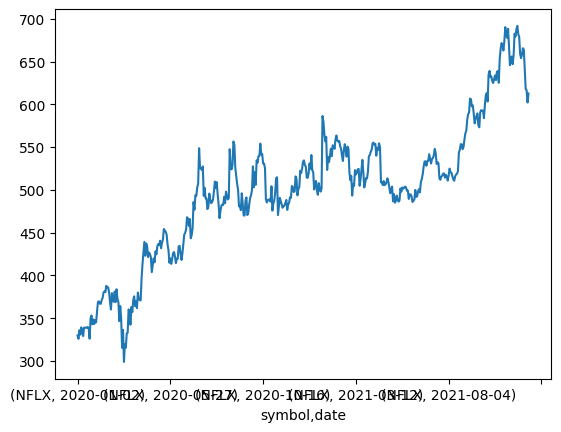

In [13]:
df["adjclose"].plot()

In [22]:
tickers = ["META", "AMZN", "AAPL", "NFLX", "GOOG", "MSFT"]
total_df = yf.download(tickers, start=comienzo, end=final)["Adj Close"]
total_df.head()

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,GOOG,META,MSFT,NFLX
Date,,,,,,
2020-01-02,73.347946,94.900497,68.368500,209.779999,155.422043,329.809998
2020-01-03,72.634850,93.748497,68.032997,208.669998,153.486771,325.899994
2020-01-06,73.213600,95.143997,69.710503,212.600006,153.883484,335.829987
2020-01-07,72.869286,95.343002,69.667000,213.059998,152.480423,330.750000
2020-01-08,74.041496,94.598503,70.216003,215.220001,154.909225,339.260010


In [23]:
total_df.tail()

,AAPL,AMZN,GOOG,META,MSFT,NFLX
Date,,,,,,
2021-11-30,163.868958,175.353500,142.451996,324.459991,325.990112,641.900024
2021-12-01,163.343552,172.186005,141.617996,310.600006,325.487213,617.770020
2021-12-02,162.342285,171.867996,143.776505,310.390015,324.905426,616.469971
2021-12-03,160.438904,169.489502,142.520493,306.839996,318.515656,602.130005
2021-12-06,163.888794,171.368500,143.796494,317.869995,321.651367,612.690002


### Calculamos si hay Correlación

In [24]:
correl = total_df.corr()
correl

,AAPL,AMZN,GOOG,META,MSFT,NFLX
AAPL,1.000000,0.917762,0.885393,0.927159,0.926441,0.890005
AMZN,0.917762,1.000000,0.731403,0.861087,0.816733,0.874288
GOOG,0.885393,0.731403,1.000000,0.922170,0.966951,0.790530
META,0.927159,0.861087,0.922170,1.000000,0.914638,0.785248
MSFT,0.926441,0.816733,0.966951,0.914638,1.000000,0.896155
NFLX,0.890005,0.874288,0.790530,0.785248,0.896155,1.000000


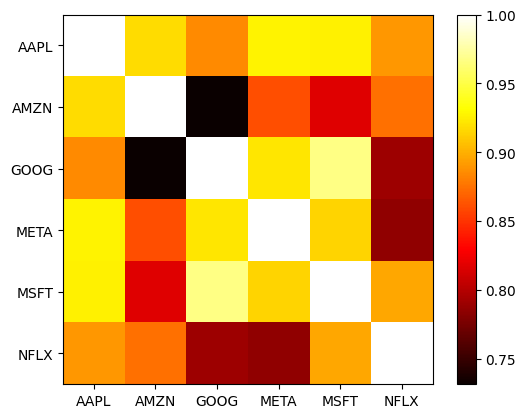

In [25]:
plt.imshow(correl, cmap="hot", interpolation="None")  # probar interpolation = 'quadric'
plt.colorbar()
plt.xticks(range(len(correl)), correl.columns)
plt.yticks(range(len(correl)), correl.columns)
plt.show()

### Data Readers Disponibles
<br> Banco Mundial
<br> Reserva Federal de EE.UU.
<br> OCDE
<br>https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

# 3- Scikit-Learn

In [26]:
import math
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import matplotlib as mpl
from matplotlib import style

In [27]:
# pd.options.display.width = 0
# Vamos a trabajar con Datos de Netflix (NFLX).
# Por si quieren probar con otros datos, también subí archivos de Disney (DIS) y Bitcoin (BTC-USD)

NFLX_df = pd.read_csv("NFLX.csv")
print(NFLX_df.head())

close_px = NFLX_df["Adj Close"]

# Preparo un DataFrame con menos datos
shorter_df = NFLX_df.loc[:, ["Adj Close", "Volume"]]

         Date        Open        High         Low       Close   Adj Close  \
0  2018-12-03  293.190002  298.720001  284.579987  290.299988  290.299988   
1  2018-12-04  288.130005  295.739990  274.720001  275.329987  275.329987   
2  2018-12-06  268.329987  283.220001  267.140015  282.880005  282.880005   
3  2018-12-07  282.480011  284.209991  263.380005  265.140015  265.140015   
4  2018-12-10  264.190002  271.179993  260.609985  269.700012  269.700012   

     Volume  
0  14117400  
1  12800600  
2  13074300  
3  12466700  
4   9605600  


In [28]:
shorter_df.head()

,Adj Close,Volume
0,290.299988,14117400
1,275.329987,12800600
2,282.880005,13074300
3,265.140015,12466700
4,269.700012,9605600


In [30]:
# Chequear si hay algún Nan:

shorter_df.isnull().values.any()

False

In [31]:
# Nos deshacemos de los Nan
# shorter_df.fillna(value=-99999, inplace=True)

In [33]:
separados_1p = int(math.ceil(0.01 * len(shorter_df)))

forecast_col = "Adj Close"
shorter_df["label"] = shorter_df[forecast_col].shift(-separados_1p)
X = np.array(shorter_df.drop("label", axis=1))

X = preprocessing.scale(X)

X_lately = X[-separados_1p:]
X = X[:-separados_1p]

y = np.array(shorter_df["label"])
y = y[:-separados_1p]

In [34]:
# Separamos los datos para Train y test, en un 80% - 20%
train, test = train_test_split(NFLX_df, test_size=0.20)

# Hacemos un Reshape a X_train
X_train = np.array(train.index).reshape(-1, 1)
y_train = train["Adj Close"]

# Regresión Lineal
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)

# Regresión Cuadrática
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# KNN
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

X_test = np.array(test.index).reshape(-1, 1)
y_test = test["Adj Close"]

# Generamos un array de Y con los valores que se predicen
y_pred_reg = clfreg.predict(X_test)
y_pred_poly2 = clfpoly2.predict(X_test)
y_pred_knn = clfknn.predict(X_test)

### Predicción mediante Regresión Lineal

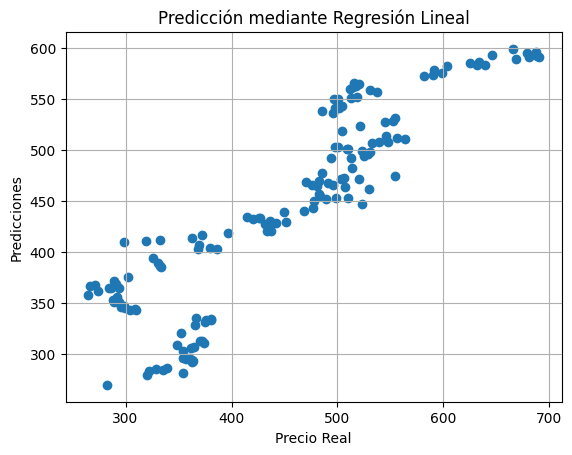

In [35]:
plt.scatter(y_test, y_pred_reg)

plt.xlabel("Precio Real")
plt.ylabel("Predicciones")

plt.title("Predicción mediante Regresión Lineal")
plt.grid()
plt.show()

### Predicción mediante Regresión Cuadrática

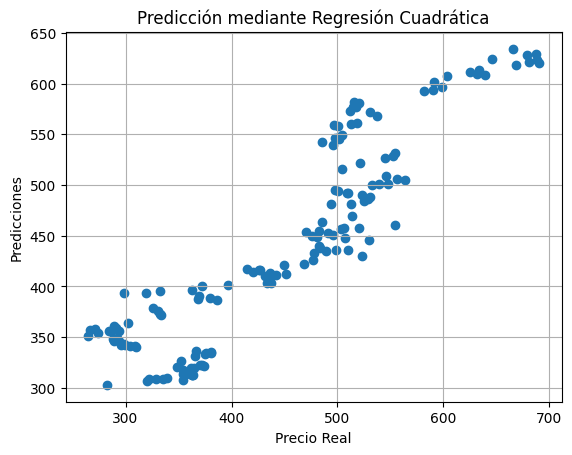

In [36]:
plt.scatter(y_test, y_pred_poly2)
plt.grid()
plt.xlabel("Precio Real")
plt.ylabel("Predicciones")

plt.title("Predicción mediante Regresión Cuadrática")

plt.show()

### Predicción mediante KNN

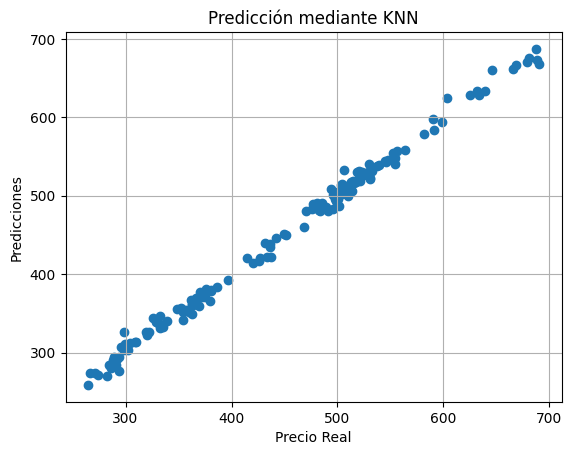

In [37]:
plt.scatter(y_test, y_pred_knn)
plt.grid()
plt.xlabel("Precio Real")
plt.ylabel("Predicciones")

plt.title("Predicción mediante KNN")

plt.show()